In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.linalg import inv

df = pd.read_csv('Covid_Factors_Data.csv')
df_C19 = pd.read_csv('us-counties-2020.csv')

## All the code in this and the next cell reformat the data and make it easier for other users to investigate different component
## of the data 

# Import Population stats for 2020-2022
Pop_2020 = df['POP_2020']
Pop_2021 = df['POP_2021']
Pop_2022 = df['POP_2022']

# Reformat Population data
df['POP_2020'] = df['POP_2020'].replace('-', np.nan)
df['POP_2020'] = df['POP_2020'].astype(float)

df['POP_2021'] = df['POP_2021'].replace('-', np.nan)
df['POP_2021'] = df['POP_2021'].astype(float)

df['POP_2022'] = df['POP_2022'].replace('-', np.nan)
df['POP_2022'] = df['POP_2022'].astype(float)

# Import College Education stats for 1980-2020
ED_1980 = df['College ED. (1980)']
ED_1990 = df['College ED. (1990)']
ED_2000 = df['College ED. (2000)']
ED_2010 = df['College ED. (2010)']
ED_2020 = df['College ED. (2020)']

# Reformat Education data
df['College ED. (1980)'] = df['College ED. (1980)'].replace('-', np.nan)
df['College ED. (1980)'] = df['College ED. (1980)'].astype(float)

df['College ED. (1990)'] = df['College ED. (1990)'].replace('-', np.nan)
df['College ED. (1990)'] = df['College ED. (1990)'].astype(float)

df['College ED. (2000)'] = df['College ED. (2000)'].replace('-', np.nan)
df['College ED. (2000)'] = df['College ED. (2000)'].astype(float)

df['College ED. (2010)'] = df['College ED. (2010)'].replace('-', np.nan)
df['College ED. (2010)'] = df['College ED. (2010)'].astype(float)

df['College ED. (2020)'] = df['College ED. (2020)'].replace('-', np.nan)
df['College ED. (2020)'] = df['College ED. (2020)'].astype(float)

# Import Hospital Bed data
Hos_Beds = df['Number of Beds']
Bed_Number = df['Number of Beds'].values

# Reformat Hospital Bed data
df['Number of Beds'] = df['Number of Beds'].replace('-', np.nan)
df['Number of Beds'] = df['Number of Beds'].astype(float)

state         county      
Pennsylvania  Adams             88.0
              Allegheny       1009.0
              Armstrong         69.0
              Beaver           252.0
              Bedford           94.0
                               ...  
              Washington       131.0
              Wayne             18.0
              Westmoreland     423.0
              Wyoming           29.0
              York             419.0
Name: deaths, Length: 68, dtype: float64
state  county    
Ohio   Adams          14.0
       Allen         111.0
       Ashland        37.0
       Ashtabula      66.0
       Athens          9.0
                     ...  
       Washington     38.0
       Wayne         146.0
       Williams       48.0
       Wood          146.0
       Wyandot        33.0
Name: deaths, Length: 89, dtype: float64


Text(0.5, 1.0, 'Total Covid Deaths for Each PA County')

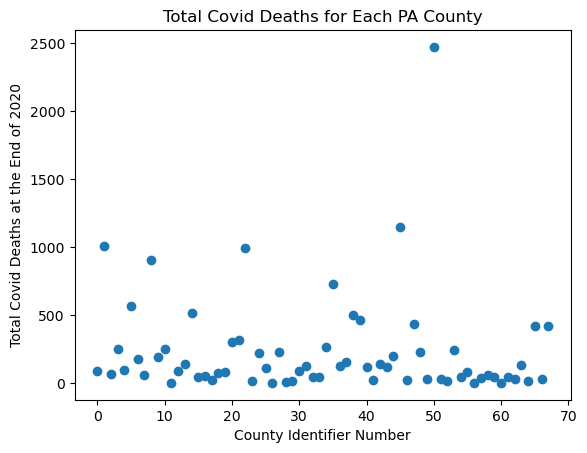

In [2]:
# Code creates the necessary variables to compare Covid deaths per county and Education 

df['Education_Group'] = 0
df['Education_Group'] = (df['College ED. (2020)'] > 25).astype(int) 
ED = df['Education_Group'].values

pa_data = df_C19[(df_C19['state'] == 'Pennsylvania')]

# Group the data by county and sum the death totals for the entire year (This can be done by identifying the max total)
pa_county_deaths = pa_data.groupby(['state', 'county'])['deaths'].max()

pa_county_deaths_values = pa_county_deaths.values

print(pa_county_deaths)

oh_data = df_C19[(df_C19['state'] == 'Ohio')]

# Group the data by county and sum the death totals for the entire year
oh_county_deaths = oh_data.groupby(['state', 'county'])['deaths'].max()

oh_county_deaths_values = oh_county_deaths.values

print(oh_county_deaths)

combined_deaths_values = np.concatenate([pa_county_deaths_values, oh_county_deaths_values])

# Creating groups to plot education stats with death total for both states individually
EDU = df['College ED. (2020)']
EDU = EDU.replace('-', np.nan)
EDU = EDU.astype(float)

pa_EDU = EDU[:70]
oh_EDU = EDU[71:]

df['County_ID'] = pd.factorize(df['County'])[0]

pa_county_ID = df['County_ID'][:68].values
oh_county_ID = df['County_ID'][70:].values

plt.scatter(pa_county_ID, pa_county_deaths)
plt.xlabel('County Identifier Number')
plt.ylabel('Total Covid Deaths at the End of 2020')
plt.title('Total Covid Deaths for Each PA County')


Text(0.5, 1.0, 'Total Covid Deaths for Each OH County')

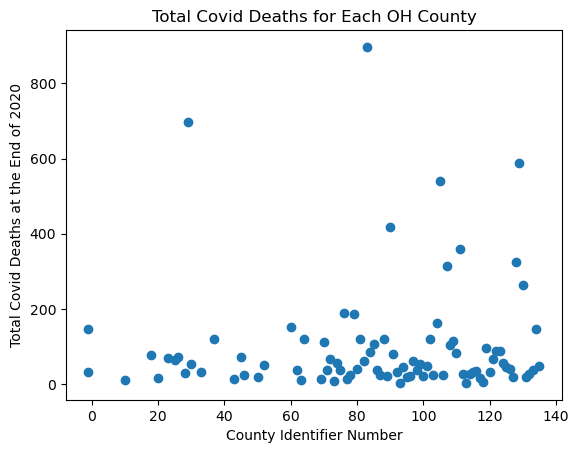

In [3]:
# Use index ranges in case where data is missing for particular counties
plt.scatter(oh_county_ID[:len(oh_county_deaths)], oh_county_deaths)
plt.xlabel('County Identifier Number')
plt.ylabel('Total Covid Deaths at the End of 2020')
plt.title('Total Covid Deaths for Each OH County')

Text(0.5, 1.0, 'Total Covid Deaths vs. College Education Percentage')

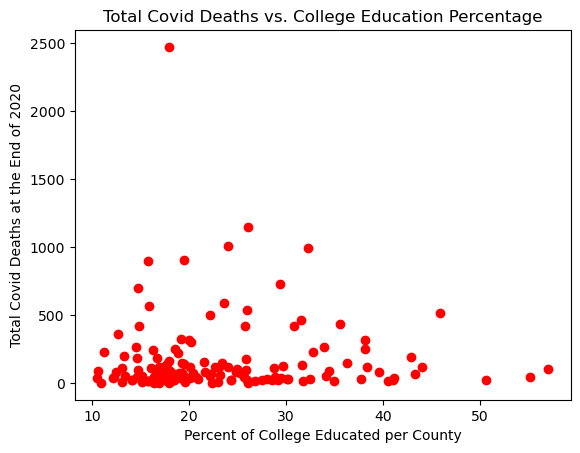

In [4]:
plt.scatter(EDU[:len(combined_deaths_values)], combined_deaths_values,  color='red')
plt.xlabel('Percent of College Educated per County')
plt.ylabel('Total Covid Deaths at the End of 2020')
plt.title('Total Covid Deaths vs. College Education Percentage')

Text(0.5, 1.0, 'Total Covid Deaths vs. Total Hospital Bed Count')

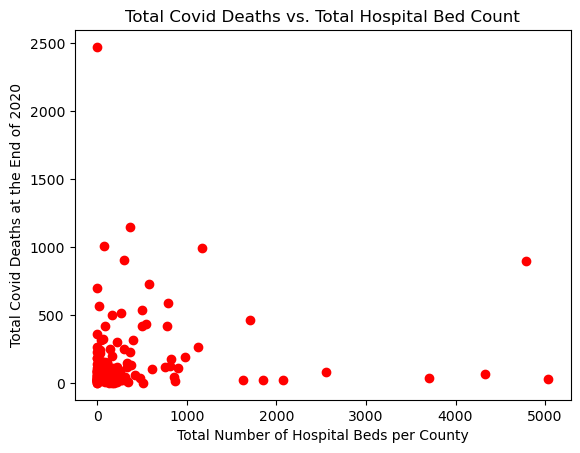

In [5]:
plt.scatter(Bed_Number[:len(combined_deaths_values)], combined_deaths_values,  color='red')
plt.xlabel('Total Number of Hospital Beds per County')
plt.ylabel('Total Covid Deaths at the End of 2020')
plt.title('Total Covid Deaths vs. Total Hospital Bed Count')

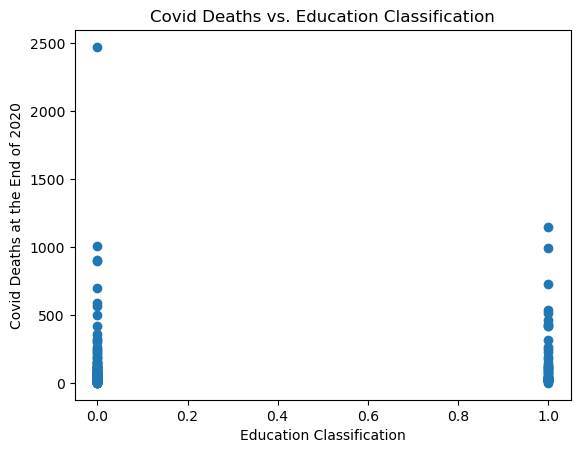

In [6]:
# Create the scatter plot
plt.scatter(ED[:len(combined_deaths_values)], combined_deaths_values)
plt.xlabel('Education Classification')
plt.ylabel('Covid Deaths at the End of 2020')
plt.title('Covid Deaths vs. Education Classification')
plt.show()

EDU = df['College ED. (2020)'].values

In [7]:
# Linear Regression Analysis of Education and Covid Deaths 
ED_fit = ED[:len(combined_deaths_values)]
model = sm.OLS(combined_deaths_values,sm.add_constant(ED_fit)).fit();
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5080
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.477
Time:                        21:06:19   Log-Likelihood:                -1106.9
No. Observations:                 157   AIC:                             2218.
Df Residuals:                     155   BIC:                             2224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        148.5463     27.021      5.498      0.0

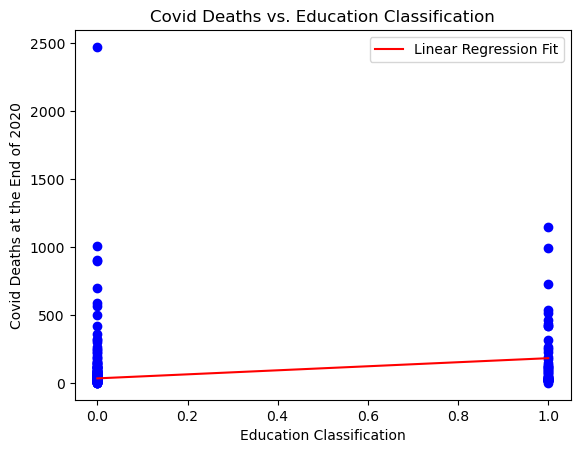

In [8]:
# Define linear regression parameters to generate the fit to the data
model_slope = 148.54
model_constant = 34.47

y_model = np.zeros(2)

y_model[0] = model_constant 
y_model[1] = model_slope*1 + model_constant 

y_fit = [y_model[0], y_model[1]]

plt.plot(ED[:157],combined_deaths_values, 'bo')
plt.plot([0,1], y_fit, 'r-', label='Linear Regression Fit')
plt.xlabel('Education Classification')
plt.ylabel('Covid Deaths at the End of 2020')
plt.title('Covid Deaths vs. Education Classification')
plt.legend()
plt.show()

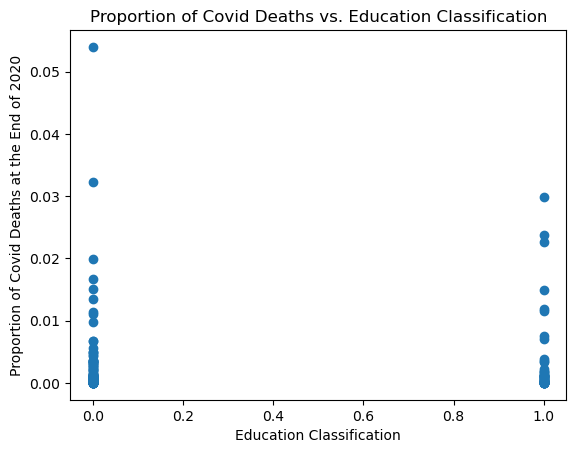

In [9]:
oh_county_deaths_n = np.zeros(len(oh_county_deaths))

for i in range(len(oh_county_deaths)):
    oh_county_deaths_n[i] = oh_county_deaths[i] / df['POP_2020'].values[i]
    
oh_county_deaths_n = oh_county_deaths_n = oh_county_deaths_n[~np.isnan(oh_county_deaths_n)]
#print (oh_county_deaths_n)

pa_county_deaths_n = np.zeros(len(pa_county_deaths))

for i in range(len(pa_county_deaths)):
    pa_county_deaths_n[i] = pa_county_deaths[i] / df['POP_2020'].values[i]
    
pa_county_deaths_n = pa_county_deaths_n = pa_county_deaths_n[~np.isnan(pa_county_deaths_n)]
#print (pa_county_deaths_n)

combined_deaths_n = np.concatenate([pa_county_deaths_n, oh_county_deaths_n])

plt.scatter(ED[:len(combined_deaths_n)], combined_deaths_n)
plt.xlabel('Education Classification')
plt.ylabel('Proportion of Covid Deaths at the End of 2020')
plt.title('Proportion of Covid Deaths vs. Education Classification')
plt.show()

In [10]:
# Linear Regression Analysis of Education and Covid Deaths in Proportion to Population Size 
ED_fit = ED[:len(combined_deaths_n)]
model = sm.OLS(combined_deaths_n,sm.add_constant(ED_fit)).fit();
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1491
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.700
Time:                        21:06:20   Log-Likelihood:                 551.89
No. Observations:                 154   AIC:                            -1100.
Df Residuals:                     152   BIC:                            -1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.001      4.534      0.0

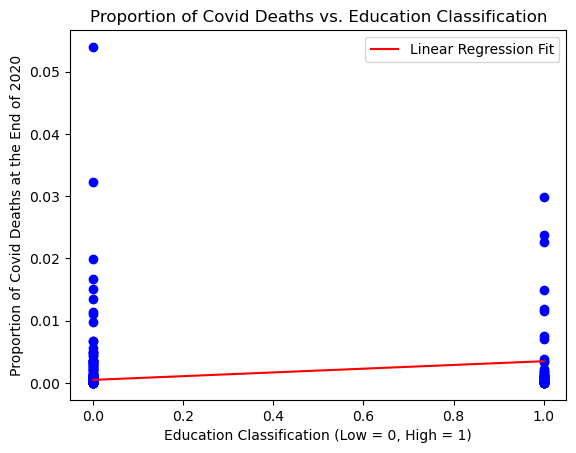

In [11]:
# Define linear regression parameters to generate the fit to the data
model_slope = 3e-03
model_constant = 5e-04

y_model = np.zeros(2)

y_model[0] = model_constant 
y_model[1] = model_slope*1 + model_constant 

y_fit = [y_model[0], y_model[1]]

plt.plot(ED_fit,combined_deaths_n, 'bo')
plt.plot([0,1], y_fit, 'r-', label='Linear Regression Fit')
plt.xlabel('Education Classification (Low = 0, High = 1)')
plt.ylabel('Proportion of Covid Deaths at the End of 2020')
plt.title('Proportion of Covid Deaths vs. Education Classification')
plt.legend()
plt.show()

### Conclusion: Even when Covid Deaths are normalized with respect to the population size no statistcally significant relationship is observed between Covid deaths and Education class. 

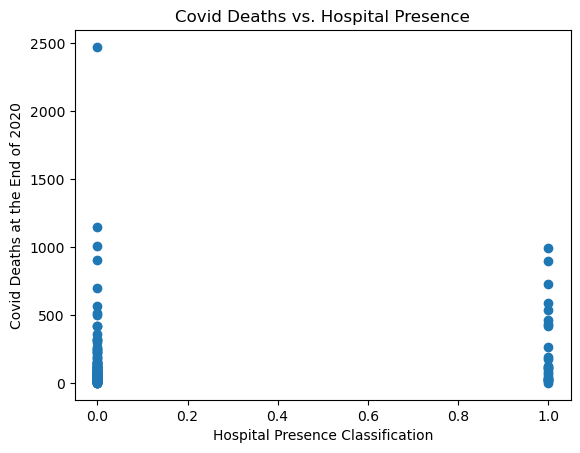

In [12]:
df['Hospital_Size'] = 0
# Create the Hospital_Size column
df['Hospital_Size'] = (df['Number of Beds'] > 500).astype(int)

# Extract Hospital_Size and combined_deaths_values
Hos_Size = df['Hospital_Size'].values

# Filter out NaN values in Hos_Size
Hos_Size = Hos_Size[~np.isnan(Hos_Size)]



# Create the scatter plot
plt.scatter(Hos_Size[:len(combined_deaths_values)], combined_deaths_values)
plt.xlabel('Hospital Presence Classification')
plt.ylabel('Covid Deaths at the End of 2020')
plt.title('Covid Deaths vs. Hospital Presence')
plt.show()


In [13]:
# Perform linear regression
Hos_Size_fit = (Hos_Size[:len(combined_deaths_values)])
model = sm.OLS(combined_deaths_values, sm.add_constant(Hos_Size_fit)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.987
Date:                Mon, 30 Oct 2023   Prob (F-statistic):             0.0476
Time:                        21:06:20   Log-Likelihood:                -1105.1
No. Observations:                 157   AIC:                             2214.
Df Residuals:                     155   BIC:                             2220.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        140.0455     24.172      5.794      0.0

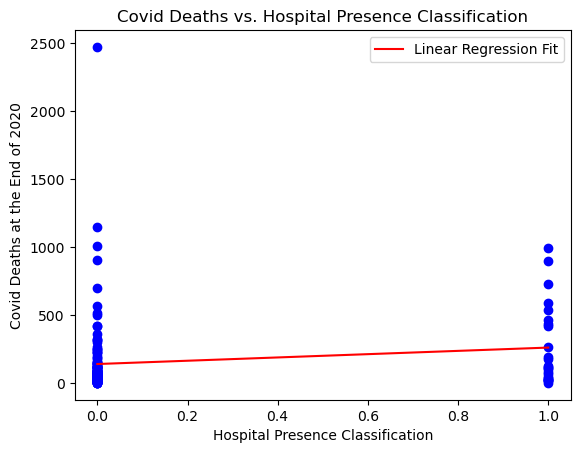

In [14]:
# Define linear regression parameters to generate the fit to the data
model_slope = 120.95
model_constant = 140.05

y_model = np.zeros(2)

y_model[0] = model_constant 
y_model[1] = model_slope*1 + model_constant 

y_fit = [y_model[0], y_model[1]]

plt.plot(Hos_Size_fit,combined_deaths_values, 'bo')
plt.plot([0,1], y_fit, 'r-', label='Linear Regression Fit')
plt.xlabel('Hospital Presence Classification')
plt.ylabel('Covid Deaths at the End of 2020')
plt.title('Covid Deaths vs. Hospital Presence Classification')
plt.legend()
plt.show()

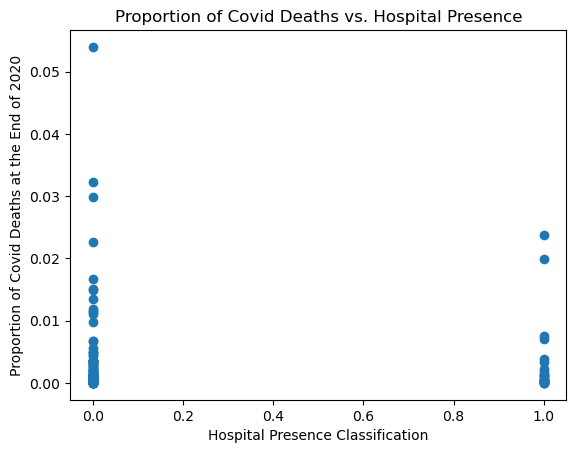

In [15]:
# Create the scatter plot
plt.scatter(Hos_Size[:len(combined_deaths_n)], combined_deaths_n)
plt.xlabel('Hospital Presence Classification')
plt.ylabel('Proportion of Covid Deaths at the End of 2020')
plt.title('Proportion of Covid Deaths vs. Hospital Presence')
plt.show()

In [16]:
# Perform linear regression
Hos_Size_fit = (Hos_Size[:len(combined_deaths_n)])
model = sm.OLS(combined_deaths_n, sm.add_constant(Hos_Size_fit)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                 0.0001229
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.991
Time:                        21:06:21   Log-Likelihood:                 551.81
No. Observations:                 154   AIC:                            -1100.
Df Residuals:                     152   BIC:                            -1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.001      5.233      0.0

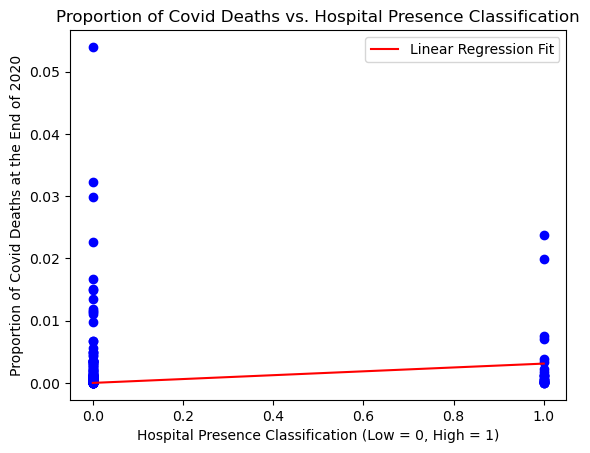

In [17]:
model_slope = 3.1e-03
model_constant = 1.64e-05

y_model = np.zeros(2)

y_model[0] = model_constant 
y_model[1] = model_slope*1 + model_constant 

y_fit = [y_model[0], y_model[1]]

plt.plot(Hos_Size_fit,combined_deaths_n, 'bo')
plt.plot([0,1], y_fit, 'r-', label='Linear Regression Fit')
plt.xlabel('Hospital Presence Classification (Low = 0, High = 1)')
plt.ylabel('Proportion of Covid Deaths at the End of 2020')
plt.title('Proportion of Covid Deaths vs. Hospital Presence Classification')
plt.legend()
plt.show()

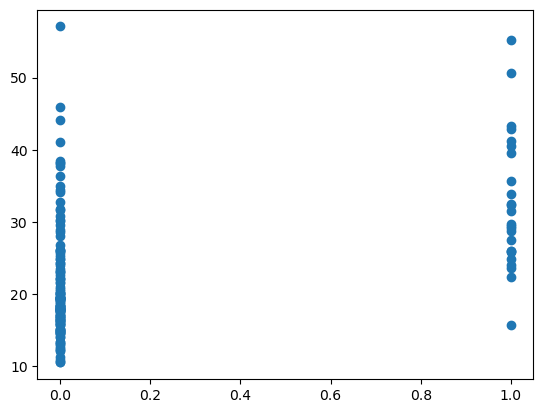

In [18]:
plt.scatter(Hos_Size, EDU)

### Initially, the results suggested that counties with a greater hospital presence had greater number of Covid deaths. However, when one normalizes the Covid deaths to the population size of each respective county it appears there is no signficant difference in number of deaths in relation to hospital presence.

In [19]:
X = np.column_stack((ED_fit,Hos_Size[:len(ED_fit)],np.ones_like(ED_fit)))

x = np.c_[np.ones(len(ED_fit)),ED_fit, Hos_Size[:len(ED_fit)]]


tmp = inv(np.matmul(np.transpose(x),x))

INTERCEPT, SLOPE, Constant = tmp @ np.transpose(x) @ ED_fit  


Interaction_var = ED_fit*Hos_Size[:len(ED_fit)]
Xs = np.column_stack((ED_fit,Hos_Size[:len(ED_fit)],Interaction_var, np.ones_like(ED_fit)))
result = sm.OLS(combined_deaths_n, Xs).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2130
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.887
Time:                        21:06:21   Log-Likelihood:                 552.14
No. Observations:                 154   AIC:                            -1096.
Df Residuals:                     150   BIC:                            -1084.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0010      0.001      0.659      0.5

#### The OLS regression results depicted above represent a formal analysis of any interaction effects between the two factors (Education and Hospital Presence). The results fit the form $y = a_1x_1 + a_2x_2 + a_3x_3 + d$, where $a_3x_3 = a_3x_1x_2$ is representative of the interaction factor between the two variables. Based on the resulting p-value we can conclude that there is no presence of a significant interaction factor in our Covid data analysis.

## Final Conclusion
### There does not exist a statistically significant relationship between Covid deaths and the two factors of interest (Education Classification and Hospital Presence) based on this analysis. However, the use of different definitions for the two factors should still be investigated because there may exist a prevalent relationship that was not observed due to the definitions established in the analysis. 